<img src="Images/imam.png" alt="imam" width="150" height="150" style="float: right"><br>
<img src="Images/ccis.jpg" alt="imam" width="200" height="150" style="float: left"><br>



## Table of contents 

- **[1.Introduction](#Introduction)**

- **[2.Constraint Satisfaction Problem](#Constraint-Satisfaction-Problem)**
- **[3.N-queen problem](#N-queen-proplem)**
- **[4.Problem formulation](#Problem-formulation)**
    - **[4.1 Incremental formulation](##Incremental-formulation)**
- **[5. Heuristics for N-queen](#Heuristics-for-N-queen)**
- **[6. CSP Algothims](#CSP-Algothims)**
    - **[6.1 Arc Consistency AC-3](#Arc-Consistency-AC-3)**
    - **[6.2 AC-3 with Backtracking](#AC-3-with-Backtracking)**
    - **[6.3 Forward Checking](#Forward-Checking)**
- **[7.Algorithms Analysis](#Algorithms-Analysis)**
    - **[7.1 Arc Consistency AC-3 analysis](#Arc-Consistency-AC-3-analysis)** 
    - **[7.2 AC-3 with Backtracking analysis](###AC-3-with-Backtracking-analysis)**
    - **[7.3 Forward Checking analysis](#Forward-Checking-analysis)**
    - **[7.4 Comparison between AC-3 and AC-3 with Backtracking and Forward Checking](#Comparison-between-AC-3-and-AC-3-with-Backtracking-and-Forward-Checking)**
    - **[7.5 Comparison Results](#Comparison-Results)**
- **[8.Contribution](#Contribution)**
- **[9.Refrences](#Refrences)**

In [1]:
from Library.CSP import *
from collections import deque
from copy import deepcopy
import time  
from matplotlib import pyplot as plt 
from matplotlib.animation import FuncAnimation 
from itertools import count

# Delete after development
%load_ext autoreload
%autoreload 2

# Introduction

This notebook will provide you with an AI tutorial about Constraints Satisfaction Problem (CSP). The notebook will explain the algorithms and related concepts in both Arabic and English. The notebook also explains how to implement the algorithms and enable the reader to test the algorithms using Python code. The notebook will provide a comparison between the algorithms and present the results and provide diagrams.

<b> This notebook is done by us as part of the Artificial Intelligence course (CS340) - supervised by Prof. Hachemi Bennaceur</b>
<p style="text-align:right">
 ستوفر لك هذه المفكرة دروس عن الذكاء الإصطناعي حول مسألة إرضاء القيود. المفكرة سوف تشرح المفاهيم المتعلقة بخوارزميات مسألة إرضاء القيود باللغة العربية والإنجليزية. المفكرة أيضا سوف تشرح 
.كيفية تنفيذ الخوارزميات و تمكين القارئ من اختبار الخوارزميات بإستخدام أكواد برمجية بلغة بايثون. وإجراء مقارنات بين الخوارزميات وتمثيلها بيانيا   
</p>
<p style="text-align:right">
 تم إعداد هذه المفكرة بواسطتنا لمشروع مادة الذكاء الإصطناعي عال340 - بإشراف أ.د. هاشمي أحمد بن ناصر 
</p>

# Constraint Satisfaction Problem

<b>Constraint satisfaction problem (CSP)</b> represents state using a variable that can take assignments from a list of values called the domain of the variable. The desired properties are specified as constraints which are relations on one or many of the variables. It consist of the following: <br>
* A set of n objects (V = {V<sub>1</sub>, V<sub>2</sub>,..., V<sub>n</sub>})
* A set of finite domains (D = {D<sub>1</sub>, D<sub>2</sub>,..., D<sub>n</sub>})
* A set of constraints (C = {C<sub>1</sub>, C<sub>2</sub>,..., C<sub>n</sub>})
* A set of Relationships (R = {R<sub>1</sub>, R<sub>2</sub>,..., R<sub>n</sub>})

A solution is complete assignment satisfying all constraints.

Types of constraints:
* Temporal (e.g. t<sub>i</sub> > t<sub>k</sub> + d)
* Geometric (spatial) (e.g. distance (x, y) <= d)
* Algebraic numeric (e.g. x >= y + z)
* Symbolic: any no numerical constriants.

Constraint in intention:
* t<sub>i</sub> > t<sub>i</sub> + d
* $x^y$ -> z

Constraint in extension:
* C<sub>xyz</sub> constraint on X, Y, Z.
* R<sub>xyz</sub> = {(a,a,a), (a,b,b), (b,b.a)}

Real-life applications of constraint programming:
* Scheduling
* Planing
* Language processing
* Data bases
* Resource allotaction
* Bioinformatics


# N-queen proplem

In this notebook we are taking N-queen problem to explain the algothims and implement it.<br> 
**N-quuen problem** place n queens on nxn-chessbased so that no queen attacks another. A two queens must not be in the same column, row or diagonal.
<p style="text-align:right">
في هذه المفكرة سوف نأخذ مسألة ملكات الشطرنج واستخدامها لتمثيل الخوارزميات<br>
  مسألة ملكات الشطرنج تتطلب وضع عدد معين من ملكات الشطرنج على رقعة شطرنج ذات ابعاد معينة بشرط أن لا تستطيع أي ملكة مهاجمة الأخرى، بمعنى أن لا تكون هناك ملكتان في صف واحد أو عامود واحد وأن لا تتجاوز ملكتان قطريا  
</p>
The following figure shows the placement of the first queen.<br>
<p style="text-align:right">
الصورة التي بالأسفل تمثل الموضع الأول للملكة الأولى 
</p>
<img src="Images/Queenmoves.gif" alt="queen movment" width="250" height="250" style="float: center"><br>
 
------------------------------------------------------------------------------------------------------------------------------
Here an example how to formate as CSP formulation 

N= 3 --> (Q<sub>1</sub>, Q<sub>2</sub>, Q<sub>3</sub> at r<sub>1</sub>, r<sub>2</sub> , r<sub>3</sub> respectively)<br>
<img src="Images/n-queen-example.gif" alt="N-queen-example" width="120" height="200" style="float: center"><br>
CSP formulation:
Q = {Q<sub>1</sub>, Q<sub>2</sub>, Q<sub>3</sub>} <br>
D<sub>1</sub> = D<sub>2</sub> = D<sub>3</sub> = {c<sub>1</sub>,c<sub>12</sub>,c<sub>3</sub>} <br>
C = {C<sub>12</sub>, C<sub>13</sub>, C<sub>23</sub>} <br>
R<sub>12</sub> = {(c<sub>1</sub>,c<sub>3</sub>), (c<sub>3</sub>,c<sub>1</sub>)} <br>
R<sub>13</sub> = {(c<sub>1</sub>,c<sub>2</sub>), (c<sub>2</sub>,c<sub>1</sub>), (c<sub>2</sub>,c<sub>3</sub>), (c<sub>3</sub>,c<sub>2</sub>)} <br>
R<sub>23</sub> = {(c<sub>1</sub>,c<sub>3</sub>), (c<sub>3</sub>,c<sub>1</sub>)} <br><br>
 Is there a solution ? <br>
 No

# Problem formulation 

The problem fomulation for the N-queen problem is divide into two main fomulation:

1. **Incremental formulation** start with empty bord with each action you will add queen to the board.
2. **Complete-sate formulation** start with all queen on the bord and moves them around.

This notebook is going to explain only Incremental formulation.

<p style="text-align:right">
<br>:تنقسم مسألة الملكات إلى قسمين<br>
<br>١- الصيغة التدريجية - نبدأ برقعة شطرنج فارغة، لكل حركة نضع ملكة في رقعة الشطرنج<br>
٢- الصيغة الكاملة - نبدأ بوجود الملكات على رقعة الشطرنج وتحريك الملكات في رقعة الشطرنج
</p><br>
<p style="text-align:right">
<br>.في هذة المفكرة سوف نشرح الصيغة التدريجية فقط<br>
</p><br>

## Incremental formulation
#### Initial state
The initial state for Incremental formulation is to when the borad is empty borad. 

</p><br>
<p style="text-align:right">
.الحالة الإبتدائية للصيغة التدريجية هي عندما تكون رقعة الشطرنج فارغه
</p><br>


#### Actions
The legal action for N-quuen problem is to place queen on the bord.

</p><br>
<p style="text-align:right">
.الحركات المسموحة لمسألة الملكات هي وضع الملكة في رقعة الشطرنج فقط
</p><br>


#### State space
The state space depends on the size of the borad, if we take for example a size with 4X4 borad. Each slot will have two probability ${{empty,taken}}$, on this case the number of state are $16!$.The fisrt state we are going to have $16$ place to put quuen. After that we are going to have $15$ and so on.<br>

</p><br>
<p style="text-align:right">
حجم الحالة يعتمد على حجم رقعة الشطرنج، على سبيل المثال رقعة شطرنج بحجم ٤ في ٤. لكل خانه لديها حالتين وهما اما حالة محجوزه أو فارغة. في الحالة الفارغة عدد الحالات هي ١٦. أول حالة بيكون لديها ١٦ موقع لوضع الملكة. بعد وضع الملكة الأولى في موضعها. الحالد القادمة قيمتها ١٥ وهكذا لباقي الحالات 
</p><br>

The following figuer will show an example for the state space.<br> 

</p><br>
<p style="text-align:right">
.الصورة القادمة سوف تقدم مثال توضيحي لحجم الحالة
</p><br>

<img src="Images\State space.png" alt="N-queen-goal-test" style="float: center">

On N size board the rule to find the state space are $NXN!$.


</p><br>
<p style="text-align:right">
.في حاله كان الحجم غير معلوم هناك قاعده سوف نستخدمها وهي مضروب (ن في ن )
</p><br>


#### Goal test
The goal test is to make sure that every queen is safe from atacking.<br> 

</p><br>
<p style="text-align:right">
.الهدف هو التأكد من أن جميع الملكات في أمان من هجوم
</p><br>

<img src="Images\Eight-queens-animation.gif" alt="N-queen-goal-test" width="350" height="350" style="float: center"><br>


#### Path cost 
Each time quuen place on the borad will cost 1.

</p><br>
<p style="text-align:right">
لكل حركة من الملكة في رقعة الشطرنج سوف تكلف ١ 
</p>

# Heuristics for N-queen 

There are many Heuristics function for N-queen will be as discuss the following functions : <br> 

#### 1- **First Fit** 
First fit algorithm is an algorithm that take the first solution by defult and it will take the first slot (1,1).

How dose it work? 
The process is smiple 
- It takes the first slot which is (1,1).
- Go to the next slot on right and try if it fit. 
- If it is fit then place it.
- If not then go the to next slot.
<br><br>
 <b>The problem with first fit</b><br>
The problem with this algorithm is when it take the fisrt place it will never move to next place,beacuse it will continue to search to solution even it the path will be deadend, so it will be hard to reach the optimal solution with it.<br>


<p style="text-align:right">
١- الملائمة الأولى
</p>

<p style="text-align:right">
خوارزمية الملائمة الألى هي خوارزمية التي تأخذ اول نتيجة بشكل إفتراضي وأخذ الخانه (١،١) 
</p>

</p>
<p style="text-align:right">
كيف تعمل هذه الخوارزمية؟
</p>

</p>
<p style="text-align:right">
.طريقة العمل بسيطة
</p>

</p>
<p style="text-align:right">
أخذ أول خانه وهي (١،١) -     
</p>

</p>
<p style="text-align:right">
تذهب إلى الخانه التالية من جهة اليمين والتحقق إذا كانت مناسبه أم لا -
</p>

<p style="text-align:right">
إذا كانت مناسبة، فسوف تضع الملكة في رقعة الشطرنج -
</p>

<p style="text-align:right">
إذا لم تكن مناسبة، فسوف تبحث في الخانة التبي بعدها -
</p>
<br>
<p style="text-align:right">
:مشكلة هذه الخوارزمية
</p>

<p style="text-align:right">
المشكلة مع هذه الخوارزمية أنها إذا وضعت الملكه في خانه فإنها سوف تقوم بالبحث حتى تصل إلى طريق مسدود وتستمر حتى واذا كان هنالك طريق مسدود، ويسبب ذلك في عدم الحصول على الحل المثالي
</p>

<img src="Images\firstFit.png" alt="N-queen-goal-test" style="float: center">

-------------------------------------------------------------------------------------------------------------------------------

#### 2-Hill-Climbing
Hill-climbing algorithm is a local search algorithms. <br>
Hill-climbing choose the best move that lead to the highset score. The algorithms continue to take the best move unitl reachs the solution.<br>

How hill-climbing algorithm work?

Hill-climbing works based on number of queens being attacked. Each attack will decrease one point. If the number of attacks is low then the score will be high<br>

To calculte the number of heuristic h(s). Make pair for each attacking queen.

For example, in step 0 the number of heuristic ($h$)=6 <br>
Where the pairs are:
- ($h1$) = ($a,0$) and ($b,0$)
- ($h2$) = ($a,0$) and ($c,0$)
- ($h3$) = ($a,0$) and ($d,0$)
- ($h4$) = ($b,0$) and ($c,0$)
- ($h5$) = ($b,0$) and ($d,0$)
- ($h6$) = ($c,0$) and ($d,0$)

If there was mutiple best moves, hill climbing selects one of them randomly.<br>

Is it opmtial ?<br> 

Often hill-climping give us the optimal solution.<br>

The following figure will explain how to calculte pairs of attacking queen visually. <br>

<p style="text-align:right">
٢- تسلق التل 
</p>

<p style="text-align:right">
    .تسلق التل هو تابع لخوارزميات البحث المحلية 
</p>

<p style="text-align:right">
.تسلق التل يقوم بأختيار أفضل حركة تؤدي إلى اعلى نتيجة. الخوارزمية تقوم بأخذ أفضل حركة حتى تصل إلى الحل 
</p>

<p style="text-align:right">
كيف تعمل خوارزمية تسلق التل؟
</p>

<p style="text-align:right">
.تعتمد خوارزمية تسلق التل على عدد الملكات اللاتي يتعرضن للهجوم. كل هجوم يسبب نقص نقطة. إذا كان عدد الهجمات منخفضا، فستكون النتيجة عالية 
</p>

<p style="text-align:right">
لحساب عدد الإستكشاف. قم بوضع ازواج من الملكات المهاجمات 
</p>

<p style="text-align:right">
على سبيل المثال، في الخظوة 0 عدد الإستكشاف هو 6 
</p>

<p style="text-align:right">
:حيث تكون الأزواج
</p>

<p style="text-align:right">
 ($h1$) = ($a,0$) and ($b,0$)<br>
 ($h2$) = ($a,0$) and ($c,0$)<br>
 ($h3$) = ($a,0$) and ($d,0$)<br>
 ($h4$) = ($b,0$) and ($c,0$)<br>
 ($h5$) = ($b,0$) and ($d,0$)<br>
 ($h6$) = ($c,0$) and ($d,0$)<br>
</p>

<p style="text-align:right">
.إذا كان هنالك عدة حركات أفضل، يتم اختيار احداهم بطريقة عشوائية 
</p>

<p style="text-align:right">
هل هي مثالية؟
</p>

<p style="text-align:right">
.الخوارزمية في الغالب سوف تقدم الحل المثالي
</p>

<p style="text-align:right">
.سيوضح الرسمة القادمة كيفية حساب أزواج الملكات المهاجمات
</p>

<img src="Images\N-queen-hill-climbing.gif" alt="N-queen-hill-climbing" style="float: center">

<img src="Images\hillClimbing.png" alt="N-queen-hill-climbing2" style="float: center">

Problem: depending on initial state, can get stuck in local maxima.
<p style="text-align:right">
.مشكلة: بالإعتماد على الحاله الأولية، من الممكن العلق في الحد الأقصى المحلي 
</p>

<img src="Images\hillClimbing2.png" alt="N-queen-hill-climbing3" style="float: center">



# CSP Algothims 

### Arc Consistency AC-3
#### Difinition
AC-3 consider to be the most popular algorithm for arc consistency (see pseudocode below). To make every variable arc-consistent, the AC-3 algorithm maintains a queue of arcs to consider. (Actually, the order of consideration is not important, so the data structure is really a set, but tradition calls it a queue.) Initially, the queue contains all the arcs in the CSP. AC-3 then pops off an arbitrary arc (X<sub>i</sub>, X<sub>j</sub>) from the queue and makes X<sub>i</sub> arc-consistent with respect to X<sub>j</sub> . If this leaves D<sub>i</sub> unchanged, the algorithm just moves on to the next arc. But if this revises D<sub>i</sub> (makes the domain smaller), then we add to the queue all arcs (X<sub>k</sub>, X<sub>i</sub>) where X<sub>k</sub> is a neighbor of X<sub>i</sub>. We need to do that because the change in D<sub>i</sub> might enable further reductions in the domains of D<sub>k</sub>, even if we have previously considered X<sub>k</sub>. If D<sub>i</sub> is revised down to nothing, then we know the whole CSP has no consistent solution, and AC-3 can immediately return failure. Otherwise, we keep checking, trying to remove values from the domains of variables until no more arcs are in the queue. At that point, we are left with a CSP that is equivalent to the original CSP. They both have the same solutions but the arc-consistent CSP will in most cases be faster to search because its variables have smaller domains.<br>
<img src="Images/AC-3 Algorithm.JPG">
<img src="Images/Revise Algortihm.JPG">
#### Complexity analysis of AC-3
The complexity of AC-3 can be analyzed as follows. Assume a CSP with n variables,
each with domain size at most d, and with c binary constraints (arcs). Each arc (X<sub>k</sub>,X<sub>i</sub>) can
be inserted in the queue only d times because Xi has at most d values to delete. Checking consistency of an arc can be done in O($d^2$) time, so we get ($cd^3$) worst case-time.

In [3]:
def main():

    print("Enter number of queens: ")
    n = int(input())
    
    # Initializing following lists and dictionaries
    variables = []
    domains = {}
    neighbours = {}
    constraints = []
    
    # Assing n values for the lists and dictionaries
    Assign(n, domains, variables, neighbours, constraints)

    # Assign the result of Arc Consistency to variable consistance
    consistance = AC_3(constraints, variables, domains, neighbours)
    
    # Print consistance if the returned value true otherwise print Incosistance
    if ( consistance == True):
        print("\nConsistance")
    else:
        print("\nIncosistance")

main()

Enter number of queens: 
5

Consistance


### AC-3 with Backtracking

#### Definition
The term <b>backtracking</b> search is used for a depth-first search that chooses values for one variable at a time and backtracks when a variable has no legal values left to assign. The algorithm is shown below. It repeatedly chooses an unassigned variable, and then tries all values in the domain of that variable in turn, trying to find a solution. If an inconsistency is detected, then BACKTRACK returns failure, causing the previous call to try another value. The representation of CSPs is standardized, there is no need to supply BACKTRACKING-SEARCH with a domain-specific initial state, action function, transition model, or goal test.
<img src="Images/Backtracking.JPG">
The backtracking algorithm presented above makes use of a set of sub-functions that we detail below:
* <b>Select-Unassigned-Variable(csp, assignment):</b>
  * Decides which variable should be assigned next.
* <b>Order-Domain-Values(var, assignment, csp):</b>
  * Decides the order in which the values of the variable should be tried.
* <b>Inference(csp, var, assignment):</b>
  * Every time a variable has been assigned a value, there is the opportunity to further reduce the domains of the rest of unassigned variables using inference, such as checking for arcconsistency. While the call to this function is not strictly necessary.

#### Complexity analysis of AC-3 with backtracking
The backtracking algorithms complexity for N-queen problem is O(n!).

In [ ]:
def main():

    print("Enter number of queens: ")
    n = int(input())
    print("")
    
    # Initializing following lists and dictionaries
    variables = []
    domains = {}
    neighbours = {}
    constraints = []
    
    # Assing n values for the lists and dictionaries
    Assign(n, domains, variables, neighbours, constraints)

    # Assign the result of Arc Consistency to variable consistance
    consistance = AC_3(constraints, variables, domains, neighbours)
    
    # Print consistance if the returned value true otherwise print Incosistance
    if ( consistance == True):
        print("Consistance\n")
    else:
        print("Incosistance\n")
    
    
    assignment = {} # Initialize assignment dictonary
    
    # Return assignment after backtracking (solution) otherwise failuer
    Backtracking(variables, domains, assignment, constraints)
    
    # If there is a solution Print the solution as representation of the board otherwise print no solution 
    Display(variables, n, assignment)                                                                                   

main()

### Forward Checking

#### Definition

Forward Checking(FP) is one way to reduce the cost of constraint propagation, at the risk of a poorer approximation to the minimal domains and an increase in the overall search cost, is to restrict the application of arc consistency. FP maintains arc consistency on constraints with exactly one uninstantiated variable.
<img src="Images/Forward-Checking Algorithm.JPG">
The forward checking algorithm presented above makes use of a set of sub-functions that we detail below:

* <b>colFind(constraints, domains, xi, assignment):</b>
  * Looking ahead at every node to eliminate obvious failure values from the domain of the next unassigned variable.
* <b>domainWipeOutCheck(constraints, domains, xi, assignment)</b>
  * Checks for domain wipe out (size of the domain becomes zero). After new vairable assigned, return True if domain domain wipe out, false otherwise.

#### Complexity analysis of Forward Checking

Forward checking only checks arc-consistency for arcs that terminate on the new assignment. Therefore, it has a $\mathcal{O}(ek)$ complexity, where $k$ is the domain's size and $e$ are the number of binary constraints.

In [ ]:
def main():

    print("Enter number of queens: ")
    n = int(input())
    print("")
    
    # Initializing following lists and dictionaries
    variables = []
    domains = {}
    neighbours = {}
    constraints = []
    
    # Assing n value for the lists and dictionaries
    Assign(n, domains, variables, neighbours, constraints)

    # Assign the result of Arc Consistency to variable consistance
    consistance = AC_3(constraints, variables, domains, neighbours)
    
    # Print consistance if the returned value true otherwise print Incosistance
    if ( consistance == True):
        print("Consistance\n")
    else:
        print("Incosistance\n")
    
    assignment = {} # Initialize assignment dictonary
  
    # Return assignment after forward checking (solution) otherwise return failure
    Forwardchecking(variables, domains, assignment, constraints)
  
    # If there is a solution Print the solution as representation of the board otherwise print no solution 
    Display(variables, n, assignment)                                                                                   

main()

# Algorithms Analysis

This section provides The analysis of algorithms and comparison between each other. <br>
The analysis in this section will show the time taken to solve each algorithm based on the number of queens.<br>

Each algorithm analysis has two main parts:
- The first part shows the time taken to place queens on the board based on what number of queens you choose.
- The second part shows the growth rate for the algorithm based on the number of queens you choose.

<p style="text-align:right">
.في هذا القسم سوف يوفر تحليل الخوارزميات والمقارانات بينهم
</p>

<p style="text-align:right">
.التحاليل المقدمة في هذا القسم توفر الوقت الذي يستغرقه كل خوارزمية بالإعتماد على عدد الملكات
</p>

<p style="text-align:right">
:لكل تحليل خوارزمية لديها قسمين رئيسين
</p>

<p style="text-align:right">
القسم الأول يظهر الوقت المستغرق لوضع الملكات بالإعتماد على عدد الملكات المعطاه -
</p>

<p style="text-align:right">
القسم الثاني يظهر معدل التغير لكل خوارزمية بالإعتماد على عدد الملكات المعطاه -
</p>

### Arc Consistency AC-3 analysis

In [ ]:
N = 100  # N is the size of borad and the number of queen. 
strat_tiem = time.time() # here is the start of timer 
arc_Consistency_AC3_analysis(N) # AC-3 beging to processing 
end_time = time.time() #  end of timer 
print("Time taken to solve %s 100 queens on AC-3 %f" % (N , end_time - strat_tiem)) #output for the total time takes 

In [ ]:
Queen_numbers_x = [] 
time_takes_y= []

for N in range(16): # we recomaned don't put N more than 20 
    
    strat_tiem = time.time() # here is the start of timer
    arc_Consistency_AC3_analysis(N) # AC-3 beging to processing 
    end_time = time.time() #  end of timer
    Queen_numbers_x.append(N)
    time_takes_y.append((end_time - strat_tiem))
    ##print("Time taken to solve %s queens on AC-3 %f" % (N , end_time - strat_tiem)) #output for the total time takes 

plt.plot(Queen_numbers_x , time_takes_y , color="#444444" , label="AC-3")
plt.title("AC-3 Execution Time")
plt.xlabel("Number of Queens on The Borad")
plt.ylabel("Execution Time")

### AC-3 with Backtracking analysis

In [ ]:
N = 15  # N is the size of borad and the number of queen. 
strat_tiem = time.time() # here is the start of timer 
AC3_with_backtracking_analysis(N) # AC-3 beging to processing 
end_time = time.time() #  end of timer 
print("Time taken to solve %s queens on AC-3 %f" % (N , end_time - strat_tiem)) #output for the total time takes 

In [ ]:
Queen_numbers_x = [] 
time_takes_y= []
inputsize = 15 # we recomaned don't put N more than 20 
for N in range(inputsize): 
    
    strat_tiem = time.time() # here is the start of timer
    AC3_with_backtracking_analysis(N) # AC-3 beging to processing 
    end_time = time.time() #  end of timer
    Queen_numbers_x.append(N)
    time_takes_y.append((end_time - strat_tiem))
    ##print("Time taken to solve %s 100 queens on AC-3 %f" % (N , end_time - strat_tiem)) #output for the total time takes 

plt.plot(Queen_numbers_x , time_takes_y , color="#444444" , label="AC-3 with Backtracking")
plt.title("AC-3 with Backtracking  execution time")
plt.xlabel("number of queens on the borad")
plt.ylabel("execution time")

### Forward Checking analysis

In [ ]:
N = 15  # N here is the size og borad and the number of queen. 
strat_tiem = time.time() # here is the start of timer 
forward_checking_analysis(N) # Forward Checking beging to processing 
end_time = time.time() #  end of timer 
print("Time taken to solve %s queens on AC-3 %f" % (N , end_time - strat_tiem)) #output for the total time takes 

Text(0, 0.5, 'execution time')

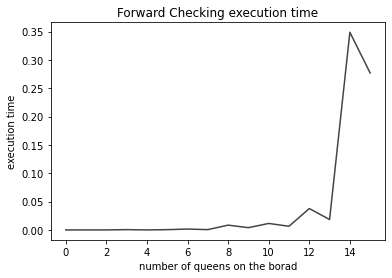

In [14]:
Queen_numbers_x = [] 
time_takes_y= []

for N in range(16): # we recomaned don't put N more than 20 
    
    strat_tiem = time.time() # here is the start of timer
    forward_checking_analysis(N) # forward checking beging to processing 
    end_time = time.time() #  end of timer
    Queen_numbers_x.append(N)
    time_takes_y.append((end_time - strat_tiem))
    ##print("Time taken to solve %s 100 queens on AC-3 %f" % (N , end_time - strat_tiem)) # output for the total time takes 

plt.plot(Queen_numbers_x , time_takes_y , color="#444444" , label="Forward Checking")
plt.title("Forward Checking execution time")
plt.xlabel("number of queens on the borad")
plt.ylabel("execution time")

### Comparison between AC-3 and AC-3 with Backtracking and Forward Checking

Text(0, 0.5, 'execution time')

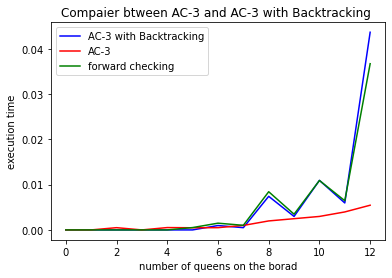

In [11]:
Queen_numbers_x = [] 
time_takes_AC3_with_Backtracking_y= []
time_takes_AC3_y= []
time_takes_FC_y= []

for N in range(13): # we recommend don't make rage mote than 20 the best will be if 16 >= N >=5 
    
    # for backtracking 
    strat_tiem_AC3_with_BT = time.time() # here is the start of timer
    AC3_with_backtracking_analysis(N) # AC-3 with backtracking  beging to processing 
    end_time_AC3_with_BT = time.time() #  end of timer
    time_takes_AC3_with_Backtracking_y.append((end_time_AC3_with_BT - strat_tiem_AC3_with_BT))
    
    # for AC3 
    strat_tiem_AC3 = time.time() # here is the start of timer
    arc_Consistency_AC3_analysis(N) # AC-3 beging to processing 
    end_time_AC3 = time.time() #  end of timer
    time_takes_AC3_y.append((end_time_AC3 - strat_tiem_AC3))
    
    # for FC
    strat_tiem_FC = time.time() # here is the start of timer
    forward_checking_analysis(N) # FC beging to processing 
    end_time_FC = time.time() #  end of timer
    time_takes_FC_y.append((end_time_FC - strat_tiem_FC))
    
    
    Queen_numbers_x.append(N)
    
    
    

plt.plot(Queen_numbers_x , time_takes_AC3_with_Backtracking_y , color="blue" , label="AC-3 with Backtracking")
plt.plot(Queen_numbers_x , time_takes_AC3_y , color="red" , label="AC-3")
plt.plot(Queen_numbers_x , time_takes_FC_y , color="green" , label="forward checking")

plt.legend()
plt.title("Compaier btween AC-3 and AC-3 with Backtracking ")
plt.xlabel("number of queens on the borad")
plt.ylabel("execution time")

### Comparison Results 
As we can see from the graph, we see that AC-3 is the fastest but AC-3 doesn't solve the problem. It returns only if the problem is arc consistent or not.<br>

For AC-3 with backtracking and forward checking, both of them return a solution. Therefore we will focus on these two algorithms.<br>

Show case in details:<br> 
- **number of queen from 1 to 10** <br>
Both forward checking and backtracking has a similar execution time<br>

- **number of queen 10 and higher**<br>
In this case, if you pick the number of queen such as 16 or higher(check the above code) then the difference in execution time will be clear.
<br>
Forward checking is faster than AC-3 with backtracking.<br>

We can say that: 
- For our N-queen problem, the best algorithm to use is forward checking since backtracking will take more time to solve it   

**Side note**: notice that when the number of queens is even, the execution time will become slower than the odd number of queens. 

<p style="text-align:right">
لا تحل المسألة. إنما ترجع المسألة متماسكة أم لا AC-3 كما نرى في الرسم البياني، نرى أن خوارزمية
</p><br>

<p style="text-align:right">
مع التراجع و التحقق الأمامي يقومون بإرجاع الحل. ولهذا سوف نركز على هذه الخوارزميات AC-3 خوارزمية
</p><br>

<p style="text-align:right">
:عرض الحالات بالتفصيل
</p>

<p style="text-align:right">
إذا كان عدد الملكات بين ١ و ١٠ 
</p>
<p style="text-align:right">
.كل من خوارزمية التراجع والتحقق الأمامي لديه وقت تنفيذ مقارب
</p>

<p style="text-align:right">
 :إذا كان عدد الملكات ١٠ فأكثر 
</p>

<p style="text-align:right">
.في الحاله هذه، إذا اخترت عدد ملكات على سبيل المثال ١٦ أو أعلى. فسوف يكون هنالك فرق واضح في وقت التنفيذ 
</p>
<br>
<p style="text-align:right">
:لذلك نستطيع أن نقول
</p>

<p style="text-align:right">
.أن أفضل خوارزمية للإستخدام لمسألة الملكات هي التحقق الامامي، لأن خوارزمية التراجع سوف تأخذ وقت أطول للحل
</p>
<br>
<p style="text-align:right">
.ملاحظة: لاحظ أن إذا كان عدد الملكات زوجي فسوف يكون وقت التنفيذ أبطأ. وإذا كان عدد الملكات فردي فسوف تكون أسرع
</p>

# Contribution 

|               Names               	|                                                                                                                                                                                                                                                                                                                                                      Contribution                                                                                                                                                                                                                                                                                                                                                     	|                        GitHub Account                       	|
|:---------------------------------:	|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:	|:-----------------------------------------------------------:	|
|   Khalid Alotaibi<br> 439012737   	| <p style= "text-align:left">CSP model of the problem: <br> Variables<br> Domains<br> Constraints<br> Relations<br> Solution<br> ------------------------------<br> Constraints Satisfaction Problems<br> ------------------------------<br> Explanation of algorithm's performance<br> ------------------------------<br> Coding & Documentation:<br> Arc Consistency AC-3<br> Backtracking with AC-3<br> Forward Checking<br> ------------------------------<br> Contribution Table<br> ------------------------------<br> References<br> ------------------------------<br> Translation to Arabic<br> ------------------------------<br> Grammer check & report editing<br> ------------------------------<br> </p> 	| [Kaalotaibi37](https://github.com/Kaalotaibi37)             	|
| Abdulaziz Ababutain<br> 438011823 	| <p style= "text-align:left"> N-queen Problem<br> -----------------------------<br> Problem formalition:<br> Initial State<br> Actions<br> State space<br> Goal test<br> -----------------------------<br> Comparison of algorithm's performance<br> </p>                                                                                                                                                                                                                                                                                                                                                                                                                                                              	| [abdulazizAbabutain](https://github.com/abdulazizAbabutain) 	|

# Refrences 

[1] [State space figure](https://ktiml.mff.cuni.cz/~bartak/constraints/propagation.html). <br>
[2] [Goal test figure](https://www.wikiwand.com/en/Eight_queens_puzzle#:~:text=The%20eight%20queens%20puzzle%20is,row%2C%20column%2C%20or%20diagonal).<br>
[3] [First fit figure and hill-climbing figure 2 and 3](https://docs.jboss.org/drools/release/5.5.0.Beta1/drools-planner-docs/html_single/index.html#d0e5858). <br>
[4] [Hill-climbing figure 1](https://www.youtube.com/watch?v=qMUIvlxnoHo). <br>

Other resources:<br>
[5] [Constraint Satisfaction problem](https://www.wikiwand.com/en/Constraint_satisfaction_problem#:~:text=Constraint%20satisfaction%20problems%20(CSPs)%20are,number%20of%20constraints%20or%20limitations.&text=CSPs%20often%20exhibit%20high%20complexity,solved%20in%20a%20reasonable%20time). <br>
[6] [Hill-climbing](https://www.wikiwand.com/en/Hill_climbing). <br>
[7] [Hill-climbing 2](https://peachturnspro.wordpress.com/2016/04/19/stuck-in-a-local-optima/). <br>
[8] [CSP example](https://peachturnspro.wordpress.com/2016/04/19/stuck-in-a-local-optima/). <br>
[9] Artificial Intelligence: A Modern Approach by  Peter Norvig, Stuart J. Russell